# Models of Inverse Beta Decay

The interactions module in ASTERIA contains two implementations of inverse beta decay:

1. A simple parametric model.
2. A tabular model based on a full calculation of the interaction.

Both calculations can be found in [Strumia and Vissani, Phys. Lett. B 564:42, 2003](https://www.sciencedirect.com/science/article/pii/S0370269303006166).

In [1]:
%matplotlib inline

from asteria.interactions import InvBetaPar, InvBetaTab
from asteria.neutrino import Flavor

import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=16)

## Compare Cross Sections and Mean Energies

For the energies of interest to IceCube, the parametric and tabular models differ by a few percent in cross section and mean energy.

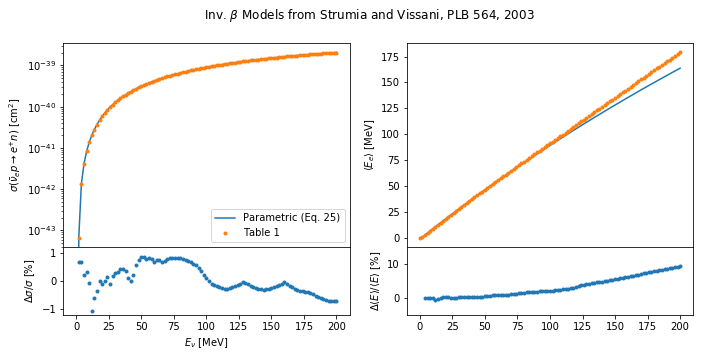

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True,
                         gridspec_kw={'height_ratios':[3,1], 'hspace':0})

xs_old = None
lep_old = None
enu = np.linspace(0., 200., 101) * u.MeV

for ibd, style, lab in zip([InvBetaPar(), InvBetaTab()],
                           ['-', '.'],
                           ['Parametric (Eq. 25)', 'Table 1']):
    xs = ibd.cross_section(Flavor.nu_e_bar, enu)
    lep = ibd.mean_lepton_energy(Flavor.nu_e_bar, enu)
    axes[0][0].plot(enu, xs, style, label=lab)
    axes[0][1].plot(enu, lep, style, label=lab)

    # Plot residuals
    if xs_old is not None and lep_old is not None:
        cut = xs_old != 0.
        res = (xs[cut] - xs_old[cut])/xs_old[cut]
        axes[1][0].plot(enu[cut], 1e2*res, style)
        cut = lep_old != 0.
        res = (lep[cut] - lep_old[cut])/lep_old[cut]
        axes[1][1].plot(enu[cut], 1e2*res, style)
    xs_old = xs
    lep_old = lep

axes[0,0].set(ylabel=r'$\sigma(\bar{\nu}_e p\rightarrow e^{+}n)$ [cm$^2$]',
              yscale='log')
axes[1,0].set(xlabel=r'$E_\nu$ [MeV]',
              ylabel=r'$\Delta\sigma/\sigma$ [%]',
              ylim=[-1.2,1.2])
axes[0,1].set(ylabel=r'$\langle E_e\rangle$ [MeV]')
axes[1,1].set(ylabel=r'$\Delta\langle E\rangle/\langle E\rangle$ [%]',
              ylim=[-5,15])

leg = axes[0,0].legend()
fig.suptitle(r'Inv. $\beta$ Models from Strumia and Vissani, PLB 564, 2003')
fig.subplots_adjust(left=0.075, right=0.95)